<a href="https://colab.research.google.com/github/manav2345/Classification-of-Homer-or-Bart-using-NN/blob/main/homer_bart_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date set: https://www.kaggle.com/datasets/juniorbueno/neural-networks-homer-and-bart-classification

In [131]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from PIL import Image

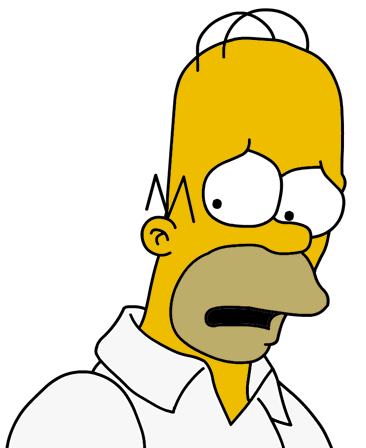

(448, 366, 3)


In [127]:
img_original = Image.open("homer95.bmp")
display(img_original)
print(np.array(img_original).shape)

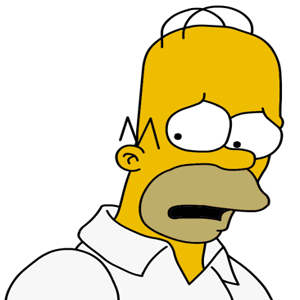

In [151]:
img = (Image.open("homer95.bmp")
       .resize((300, 300)))  # 40x40px
display(img)

In [129]:
# Making it an array
img_arr = np.array(img) # It creates a 2D array
print(img_arr)
print(img_arr.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [247 247 247]
  [ 73  73  73]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [199 199 199]
  [ 88  88  88]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [148 148 148]
  [131 131 131]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(100, 100, 3)


In [110]:
# To make it flat and simplify, as 2D doesn't gain anything
print(img_arr.reshape(-1))

[255 255 255 ... 255 255 255]


In [166]:
# Transforming all
directory = "/content"
all_img_converter = []
y_all = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        # Greyscale and resize
        img = (Image.open(f).resize((300, 300)))  # 300x300px

        # Flattening
        x = np.array(img).reshape(-1)
        all_img_converter.append(x)

        # Labelling data 1 = Bart, 0 = Homer
        y = 1
        if "homer" in filename:
            y = 0
        y_all.append(y)

x = np.array(all_img_converter)
y = np.array(y_all)
print(x.shape)
print(y.shape)

(269, 270000)
(269,)


In [167]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(215, 270000)
(215,)


In [168]:
# 16384 -> 8193 -> 8193
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (270000,), units = 128, activation='relu'))
model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │      34,560,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,568,449 (131.87 MB)

 Trainable params: 34,568,449 (131.87 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4289 - loss: 30671.9102
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - accuracy: 0.5824 - loss: 2910.9646
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.5758 - loss: 3477.9233
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 667ms/step - accuracy: 0.6503 - loss: 1032.1890
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step - accuracy: 0.7452 - loss: 632.6257
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.7779 - loss: 473.1389
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 0.7897 - loss: 861.7224
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 833ms/step - accuracy: 0.7173 - loss: 817.7955
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 762ms/step - accuracy: 0.7876 - loss: 427.0738
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - accuracy: 0.8824 - loss: 224.2503


In [170]:
# prompt: pridict the accuracy of model X_test,y_test  by accuracy score

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy*100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Accuracy: 70.37037037037037


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


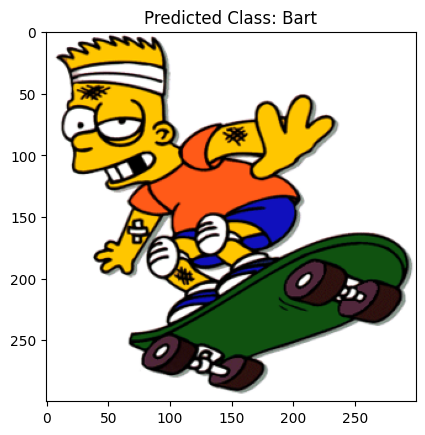

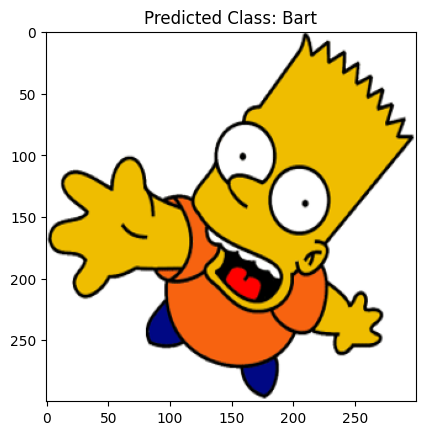

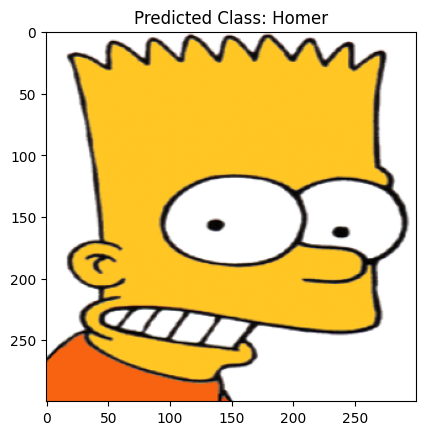

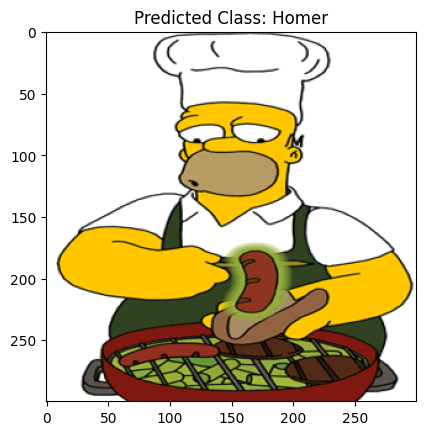

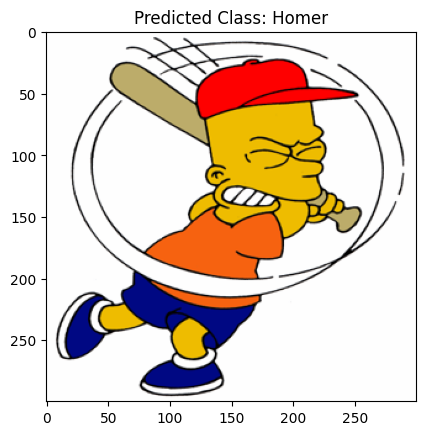

In [175]:
# prompt: make a 5 image from mode

import matplotlib.pyplot as plt

# Assuming you have your model loaded and X_test available

# Generate predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Display the images and their predicted classes
for i in range(5):
  img = X_test[i].reshape(300, 300, 3)  # Assuming images are 300x300 with 3 channels (RGB)
  plt.imshow(img.astype(np.uint8))  # Convert to uint8 for display
  if predicted_classes[i] == 1:
    plt.title(f"Predicted Class: Bart")
  else:
    plt.title(f"Predicted Class: Homer")
  plt.show()